Avacado Project

Problem Statement:
    
Avocado is a fruit consumed by people heavily in the United States. 

Content
This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV. 

The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. 

Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. 

The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.

Some relevant columns in the dataset:

Date - The date of the observation
AveragePrice - the average price of a single avocado
type - conventional or organic
year - the year
Region - the city or region of the observation
Total Volume - Total number of avocados sold
4046 - Total number of avocados with PLU 4046 sold
4225 - Total number of avocados with PLU 4225 sold
4770 - Total number of avocados with PLU 4770 sold


Inspiration /Label 

Your task is to make a mode that can consider the data provided and predict the Average Price.

In [1]:
#importing the libraries

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [2]:
#fetching the dataset

df= pd.read_csv(r'C:\Users\HP-15\Desktop\Projects\Datatrained/avocado.csv')


In [3]:
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,conventional,2015,Albany
5,5,2015-11-22,1.26,55979.78,1184.27,48067.99,43.61,6683.91,6556.47,127.44,0.00,conventional,2015,Albany
6,6,2015-11-15,0.99,83453.76,1368.92,73672.72,93.26,8318.86,8196.81,122.05,0.00,conventional,2015,Albany
7,7,2015-11-08,0.98,109428.33,703.75,101815.36,80.00,6829.22,6266.85,562.37,0.00,conventional,2015,Albany
8,8,2015-11-01,1.02,99811.42,1022.15,87315.57,85.34,11388.36,11104.53,283.83,0.00,conventional,2015,Albany
9,9,2015-10-25,1.07,74338.76,842.40,64757.44,113.00,8625.92,8061.47,564.45,0.00,conventional,2015,Albany


In [4]:
df.drop('Unnamed: 0',axis=1,inplace=True)


In [5]:
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [6]:
df.dtypes


Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
Date            18249 non-null object
AveragePrice    18249 non-null float64
Total Volume    18249 non-null float64
4046            18249 non-null float64
4225            18249 non-null float64
4770            18249 non-null float64
Total Bags      18249 non-null float64
Small Bags      18249 non-null float64
Large Bags      18249 non-null float64
XLarge Bags     18249 non-null float64
type            18249 non-null object
year            18249 non-null int64
region          18249 non-null object
dtypes: float64(9), int64(1), object(3)
memory usage: 1.8+ MB


In [8]:
df.columns

Index(['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year',
       'region'],
      dtype='object')

In [9]:
df.shape

(18249, 13)

In [10]:
df.size

237237

In [11]:
#summary of statisctics

df.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


In [12]:
df.AveragePrice.unique()

array([1.33, 1.35, 0.93, 1.08, 1.28, 1.26, 0.99, 0.98, 1.02, 1.07, 1.12,
       1.31, 1.11, 1.34, 1.45, 1.05, 1.37, 1.27, 1.32, 1.23, 1.19, 1.43,
       1.2 , 1.22, 1.13, 1.16, 1.06, 1.17, 1.24, 0.96, 1.  , 1.09, 0.95,
       0.97, 1.15, 1.01, 1.14, 1.1 , 1.04, 1.03, 1.18, 1.29, 1.25, 0.71,
       0.94, 0.91, 1.39, 1.4 , 1.36, 1.3 , 1.54, 1.59, 1.56, 1.38, 1.49,
       1.5 , 1.47, 1.42, 1.41, 1.44, 1.52, 0.9 , 0.87, 0.78, 0.92, 0.83,
       0.88, 0.84, 0.85, 1.21, 0.79, 0.89, 0.86, 0.8 , 0.82, 0.74, 0.81,
       0.77, 0.75, 0.65, 0.73, 0.68, 0.72, 0.67, 0.76, 0.62, 0.7 , 0.66,
       1.46, 0.49, 0.53, 0.56, 0.6 , 0.58, 0.54, 0.52, 0.51, 0.57, 0.63,
       0.64, 0.61, 1.48, 1.55, 1.58, 1.53, 1.57, 1.51, 0.69, 1.62, 1.63,
       1.61, 1.6 , 1.73, 1.8 , 1.86, 1.85, 1.69, 1.66, 1.65, 1.64, 1.67,
       1.68, 1.82, 2.07, 1.84, 1.83, 1.7 , 1.72, 1.81, 1.78, 0.59, 1.9 ,
       1.93, 1.99, 1.95, 1.89, 1.76, 1.71, 1.74, 0.55, 1.79, 1.75, 1.94,
       2.2 , 1.87, 1.77, 2.06, 2.11, 2.22, 2.14, 2.

In [13]:
df.AveragePrice.value_counts()

1.15    202
1.18    199
1.08    194
1.26    193
1.13    192
0.98    189
1.19    188
1.36    187
1.59    186
0.99    185
1.48    185
1.43    185
1.23    181
1.14    180
1.49    180
1.03    179
1.05    178
1.40    175
1.17    174
1.04    174
1.54    173
1.44    172
1.50    170
1.06    170
1.25    170
1.11    169
1.07    168
1.16    168
1.09    167
1.00    167
       ... 
0.55      3
2.89      3
2.70      3
2.75      3
2.99      2
2.92      2
2.60      2
2.63      2
2.53      2
3.00      2
2.94      2
2.69      2
0.49      2
2.80      2
2.95      1
0.44      1
3.04      1
0.46      1
3.25      1
2.68      1
2.78      1
2.90      1
2.97      1
3.17      1
3.12      1
3.05      1
3.03      1
2.91      1
0.48      1
2.96      1
Name: AveragePrice, Length: 259, dtype: int64

# Data visulalization

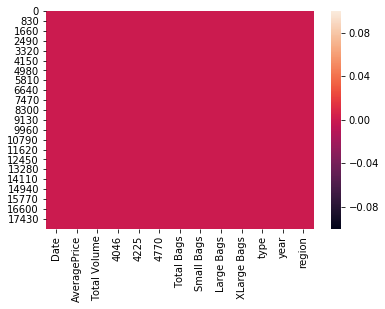

In [14]:
sns.heatmap(df.isnull())

In [15]:
# To checking the correlation

dfcor=df.corr()
dfcor

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
AveragePrice,1.000000,-0.192752,-0.208317,-0.172928,-0.179446,-0.177088,-0.174730,-0.172940,-0.117592,0.093197
Total Volume,-0.192752,1.000000,0.977863,0.974181,0.872202,0.963047,0.967238,0.880640,0.747157,0.017193
4046,-0.208317,0.977863,1.000000,0.926110,0.833389,0.920057,0.925280,0.838645,0.699377,0.003353
4225,-0.172928,0.974181,0.926110,1.000000,0.887855,0.905787,0.916031,0.810015,0.688809,-0.009559
4770,-0.179446,0.872202,0.833389,0.887855,1.000000,0.792314,0.802733,0.698471,0.679861,-0.036531
Total Bags,-0.177088,0.963047,0.920057,0.905787,0.792314,1.000000,0.994335,0.943009,0.804233,0.071552
Small Bags,-0.174730,0.967238,0.925280,0.916031,0.802733,0.994335,1.000000,0.902589,0.806845,0.063915
Large Bags,-0.172940,0.880640,0.838645,0.810015,0.698471,0.943009,0.902589,1.000000,0.710858,0.087891
XLarge Bags,-0.117592,0.747157,0.699377,0.688809,0.679861,0.804233,0.806845,0.710858,1.000000,0.081033
year,0.093197,0.017193,0.003353,-0.009559,-0.036531,0.071552,0.063915,0.087891,0.081033,1.000000


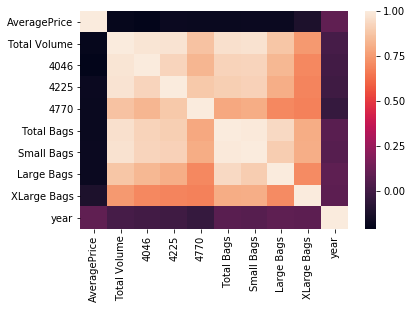

In [16]:
sns.heatmap(dfcor)


In [17]:
df.shape

(18249, 13)

In [18]:
#checking mean of Avacado

df['AveragePrice'].mean()

1.4059784097758825

In [19]:
#checking minimum price od Avacado

df['AveragePrice'].min()

0.44

In [20]:
#checking the maximum price of Avacado

df['AveragePrice'].max()

3.25

In [21]:
#Find maximum no of Avacados are sold

df['Total Volume'].max()

62505646.52

In [22]:
#How many people made the purchase

df['type'].value_counts()

conventional    9126
organic         9123
Name: type, dtype: int64

In [23]:

#Is there a correlation between Total bags and Total volume

df[['Total Volume','Total Bags']].corr()

,Total Volume,Total Bags
Total Volume,1.000000,0.963047
Total Bags,0.963047,1.000000


In [24]:
#'What was the average volume of Avocado per year? (2015-2016) ?')

df.groupby('year')['Total Volume'].mean()

year
2015    7.810274e+05
2016    8.584206e+05
2017    8.623393e+05
2018    1.066928e+06
Name: Total Volume, dtype: float64

In [25]:
#Find Avg Price of Avocado in the different region in last 2 years
df.groupby('region')['AveragePrice'].mean()

region
Albany                 1.561036
Atlanta                1.337959
BaltimoreWashington    1.534231
Boise                  1.348136
Boston                 1.530888
BuffaloRochester       1.516834
California             1.395325
Charlotte              1.606036
Chicago                1.556775
CincinnatiDayton       1.209201
Columbus               1.252781
DallasFtWorth          1.085592
Denver                 1.218580
Detroit                1.276095
GrandRapids            1.505000
GreatLakes             1.338550
HarrisburgScranton     1.513284
HartfordSpringfield    1.818639
Houston                1.047929
Indianapolis           1.313994
Jacksonville           1.510947
LasVegas               1.380917
LosAngeles             1.216006
Louisville             1.286686
MiamiFtLauderdale      1.428491
Midsouth               1.404763
Nashville              1.212101
NewOrleansMobile       1.304793
NewYork                1.727574
Northeast              1.601923
NorthernNewEngland     1.477396
O

In [26]:
df[df['AveragePrice'] > df['AveragePrice'].mean()][['AveragePrice','year','region','4046','4225','4770']]

,AveragePrice,year,region,4046,4225,4770
21,1.45,2015,Albany,509.94,62035.06,741.08
32,1.43,2015,Albany,1150.55,81955.16,94.32
274,1.54,2015,BuffaloRochester,1445.25,39831.66,88.61
275,1.59,2015,BuffaloRochester,1572.71,48468.73,134.33
276,1.56,2015,BuffaloRochester,1471.69,49388.48,173.32
278,1.49,2015,BuffaloRochester,1287.09,43655.31,170.47
279,1.50,2015,BuffaloRochester,1230.78,45937.58,258.00
280,1.47,2015,BuffaloRochester,1139.74,56289.28,349.19
281,1.47,2015,BuffaloRochester,1447.81,44620.70,471.55
284,1.45,2015,BuffaloRochester,1119.38,47294.67,4714.73


In [27]:
conventional = df[df['type'] == 'conventional']
conventional

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,conventional,2015,Albany
5,2015-11-22,1.26,55979.78,1184.27,48067.99,43.61,6683.91,6556.47,127.44,0.00,conventional,2015,Albany
6,2015-11-15,0.99,83453.76,1368.92,73672.72,93.26,8318.86,8196.81,122.05,0.00,conventional,2015,Albany
7,2015-11-08,0.98,109428.33,703.75,101815.36,80.00,6829.22,6266.85,562.37,0.00,conventional,2015,Albany
8,2015-11-01,1.02,99811.42,1022.15,87315.57,85.34,11388.36,11104.53,283.83,0.00,conventional,2015,Albany
9,2015-10-25,1.07,74338.76,842.40,64757.44,113.00,8625.92,8061.47,564.45,0.00,conventional,2015,Albany


In [28]:
#Find sales by regions
df.groupby('region')['Total Volume'].mean().sort_values()

region
Syracuse               3.237476e+04
Boise                  4.264257e+04
Spokane                4.605111e+04
Albany                 4.753787e+04
Louisville             4.762427e+04
Pittsburgh             5.564008e+04
BuffaloRochester       6.793630e+04
Roanoke                7.408879e+04
Jacksonville           8.517753e+04
Columbus               8.873776e+04
GrandRapids            8.938383e+04
Indianapolis           8.953666e+04
StLouis                9.489004e+04
Charlotte              1.051939e+05
Nashville              1.053612e+05
HarrisburgScranton     1.236948e+05
RichmondNorfolk        1.249433e+05
CincinnatiDayton       1.317219e+05
NewOrleansMobile       1.351927e+05
RaleighGreensboro      1.426116e+05
HartfordSpringfield    1.499128e+05
LasVegas               1.608784e+05
Orlando                1.735524e+05
SouthCarolina          1.797449e+05
Detroit                1.876403e+05
Tampa                  1.952797e+05
NorthernNewEngland     2.116358e+05
Philadelphia         

In [29]:
#Find the total no of sales in each year
df.groupby('year')['Total Volume'].count()

year
2015    5615
2016    5616
2017    5722
2018    1296
Name: Total Volume, dtype: int64

In [30]:
# correlation
df[['4046','4770','4225','Small Bags','Large Bags','XLarge Bags','Total Volume','Total Bags']].corr()

,4046,4770,4225,Small Bags,Large Bags,XLarge Bags,Total Volume,Total Bags
4046,1.000000,0.833389,0.926110,0.925280,0.838645,0.699377,0.977863,0.920057
4770,0.833389,1.000000,0.887855,0.802733,0.698471,0.679861,0.872202,0.792314
4225,0.926110,0.887855,1.000000,0.916031,0.810015,0.688809,0.974181,0.905787
Small Bags,0.925280,0.802733,0.916031,1.000000,0.902589,0.806845,0.967238,0.994335
Large Bags,0.838645,0.698471,0.810015,0.902589,1.000000,0.710858,0.880640,0.943009
XLarge Bags,0.699377,0.679861,0.688809,0.806845,0.710858,1.000000,0.747157,0.804233
Total Volume,0.977863,0.872202,0.974181,0.967238,0.880640,0.747157,1.000000,0.963047
Total Bags,0.920057,0.792314,0.905787,0.994335,0.943009,0.804233,0.963047,1.000000


In [31]:
df['Month'] = df['Date'].apply(lambda date:pd.Period(date, freq='M'))

In [32]:
df.head(10)

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,2015-12
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,2015-12
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,2015-12
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,2015-12
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,2015-11
5,2015-11-22,1.26,55979.78,1184.27,48067.99,43.61,6683.91,6556.47,127.44,0.0,conventional,2015,Albany,2015-11
6,2015-11-15,0.99,83453.76,1368.92,73672.72,93.26,8318.86,8196.81,122.05,0.0,conventional,2015,Albany,2015-11
7,2015-11-08,0.98,109428.33,703.75,101815.36,80.00,6829.22,6266.85,562.37,0.0,conventional,2015,Albany,2015-11
8,2015-11-01,1.02,99811.42,1022.15,87315.57,85.34,11388.36,11104.53,283.83,0.0,conventional,2015,Albany,2015-11
9,2015-10-25,1.07,74338.76,842.40,64757.44,113.00,8625.92,8061.47,564.45,0.0,conventional,2015,Albany,2015-10


In [33]:
avg_monthly_sales = df.groupby(df['Month'])['Total Volume'].mean()
avg_monthly_sales

Month
2015-01    7.363084e+05
2015-02    8.394389e+05
2015-03    7.751538e+05
2015-04    7.966305e+05
2015-05    8.958964e+05
2015-06    8.838582e+05
2015-07    8.256988e+05
2015-08    7.763793e+05
2015-09    7.620806e+05
2015-10    7.078151e+05
2015-11    6.841482e+05
2015-12    6.868351e+05
2016-01    8.803810e+05
2016-02    9.922357e+05
2016-03    9.055843e+05
2016-04    9.301684e+05
2016-05    1.039316e+06
2016-06    9.498337e+05
2016-07    8.653247e+05
2016-08    8.583263e+05
2016-09    8.386650e+05
2016-10    6.670404e+05
2016-11    6.023364e+05
2016-12    7.672402e+05
2017-01    9.876538e+05
2017-02    1.091359e+06
2017-03    8.307949e+05
2017-04    9.070639e+05
2017-05    9.854874e+05
2017-06    9.544434e+05
2017-07    8.794513e+05
2017-08    7.831782e+05
2017-09    6.592119e+05
2017-10    6.718110e+05
2017-11    7.512021e+05
2017-12    8.506164e+05
2018-01    9.946923e+05
2018-02    1.152264e+06
2018-03    1.053827e+06
Freq: M, Name: Total Volume, dtype: float64

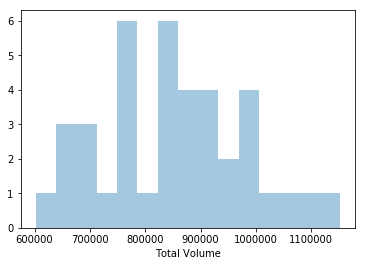

In [34]:
sns.distplot(avg_monthly_sales,bins=15, kde=False)

In [35]:
#Average Sales of Avacados by Quater of each year
df['Quater'] = df['Date'].apply(lambda date:pd.Period(date, freq='Q'))

In [36]:
avg_Q_sales = df.groupby(df['Quater'])['Total Volume'].mean()
avg_Q_sales

Quater
2015Q1    7.829814e+05
2015Q2    8.616490e+05
2015Q3    7.871549e+05
2015Q4    6.922609e+05
2016Q1    9.225527e+05
2016Q2    9.781990e+05
2016Q3    8.549684e+05
2016Q4    6.779622e+05
2017Q1    9.712989e+05
2017Q2    9.457601e+05
2017Q3    7.820628e+05
2017Q4    7.583533e+05
2018Q1    1.066928e+06
Freq: Q-DEC, Name: Total Volume, dtype: float64

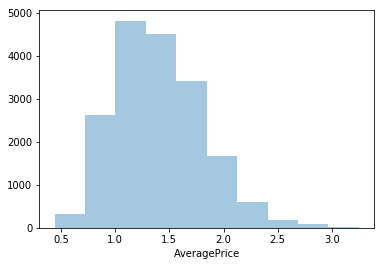

In [37]:
sns.distplot(df['AveragePrice'],bins=10, kde=False)

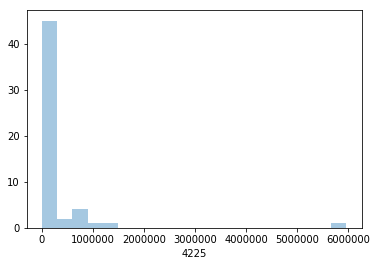

In [38]:
#Average sales of PLU 4225 by region.
sns.distplot(df.groupby('region')['4225'].mean(),bins=20, kde=False)

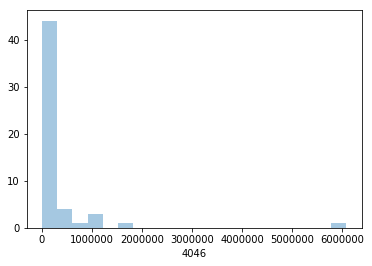

In [39]:
sns.distplot(df.groupby('region')['4046'].mean(),bins=20, kde=False)

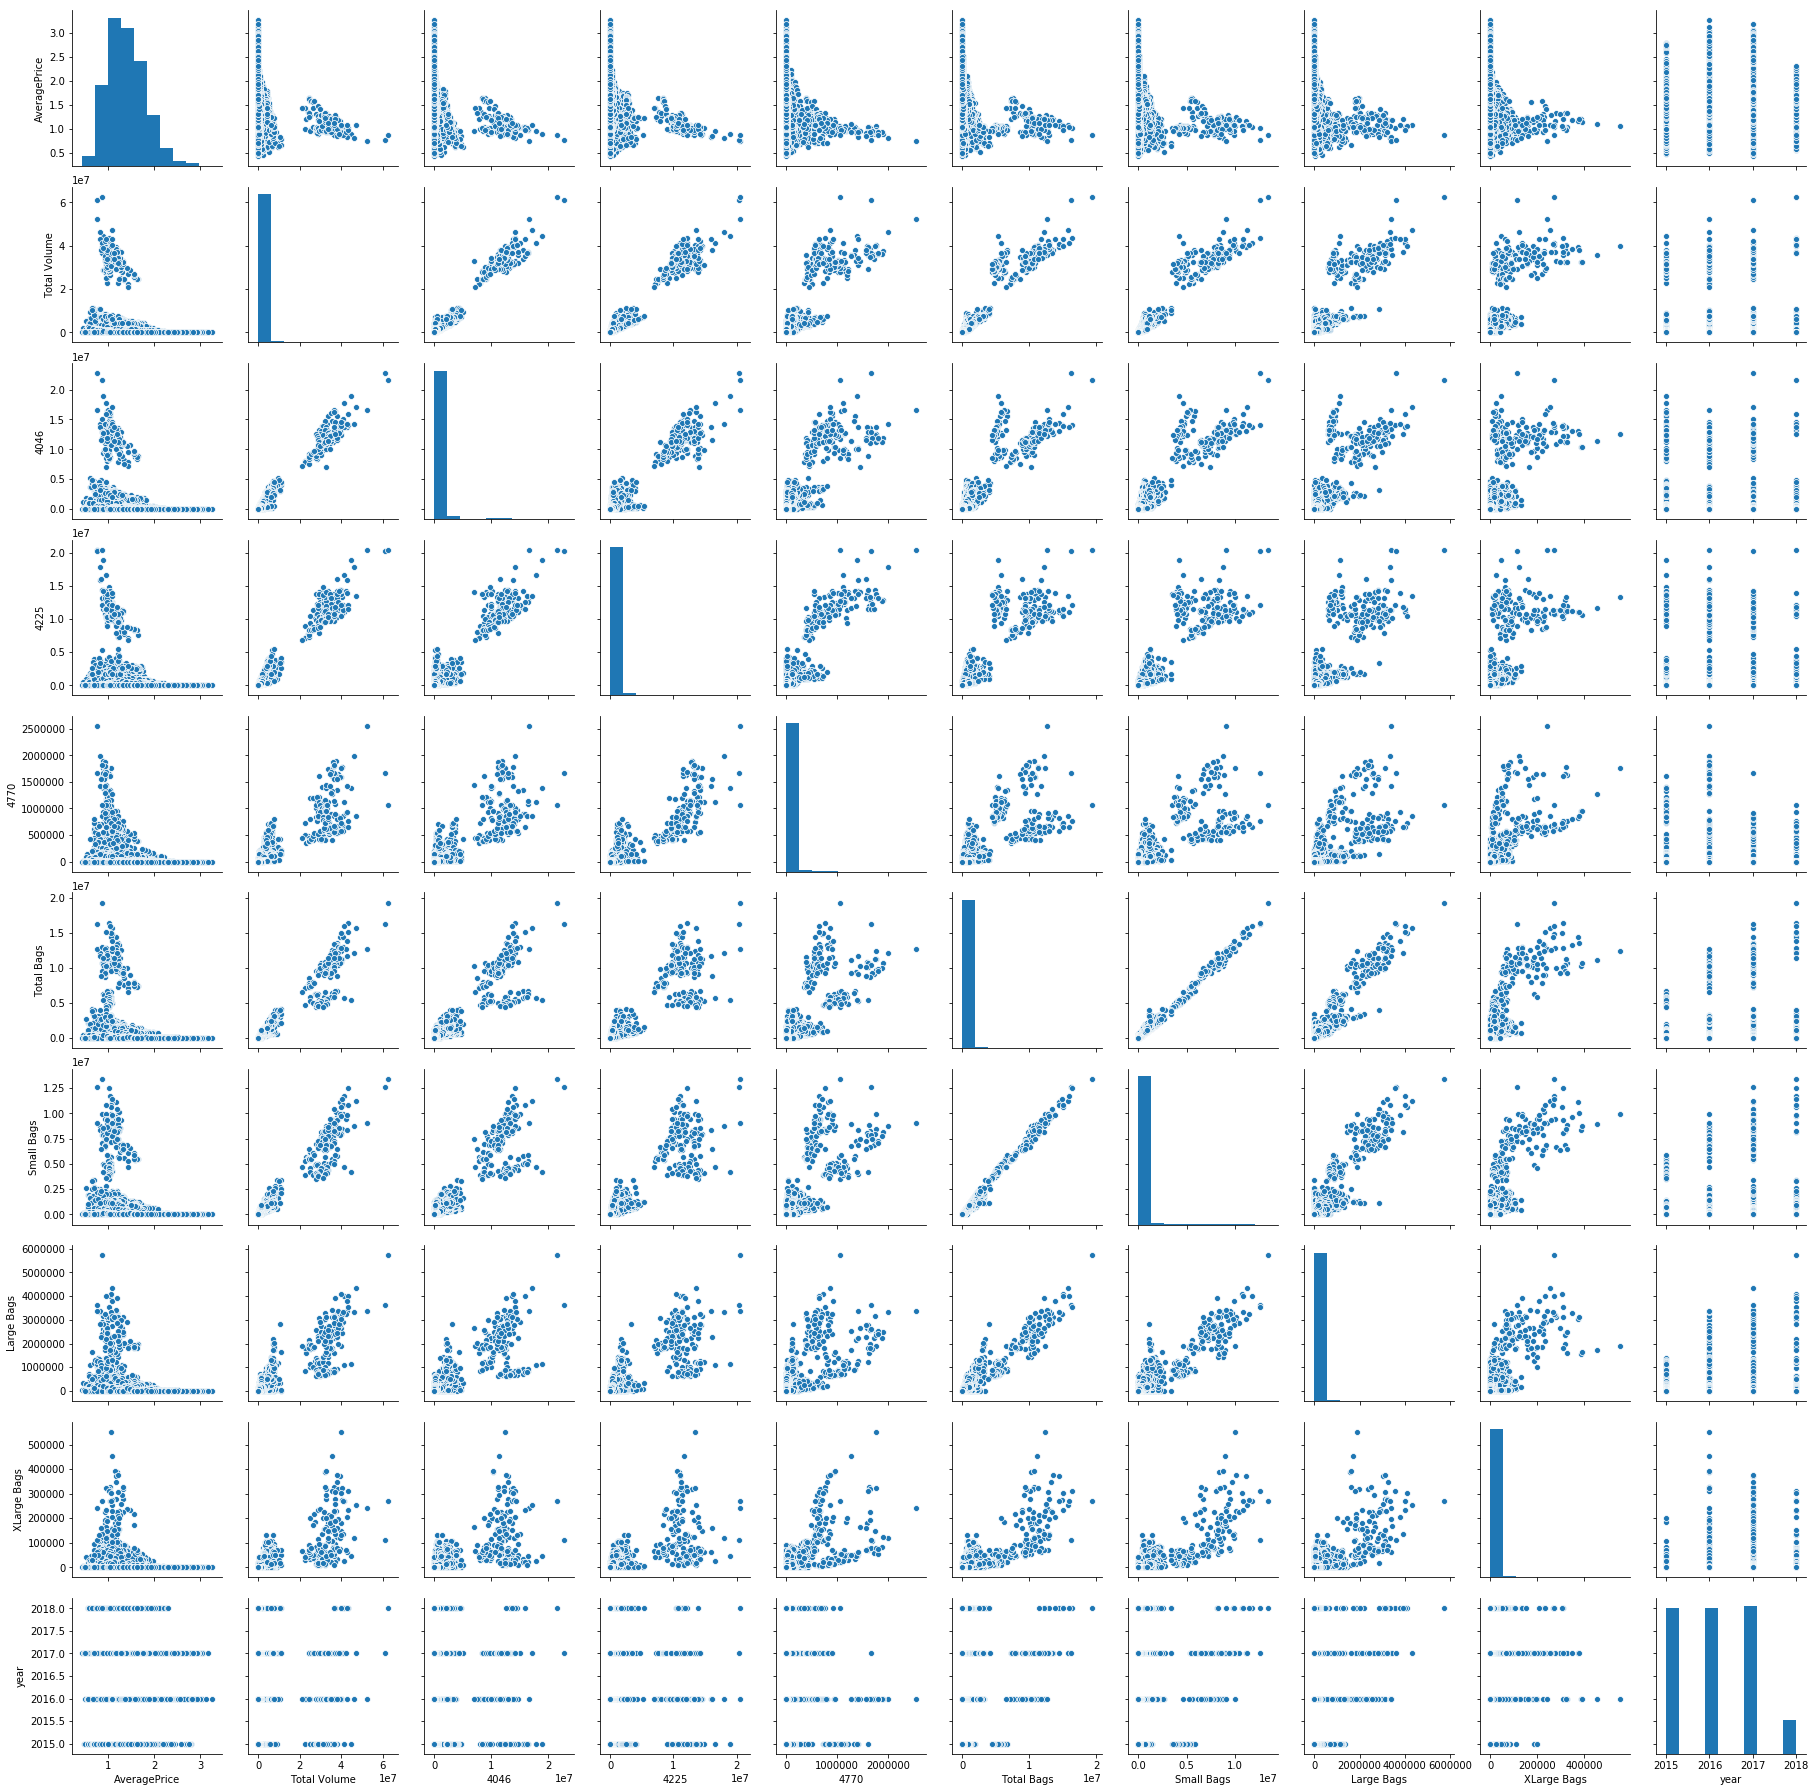

In [40]:
sns.pairplot(df)

In [41]:
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Quater
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,2015-12,2015Q4
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,2015-12,2015Q4
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,2015-12,2015Q4
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,2015-12,2015Q4
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,2015-11,2015Q4


In [42]:
y=df.drop(['Date','Quater','Month', 'Total Volume', '4046', '4225', '4770','Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year','region'], axis = 1)
y

,AveragePrice
0,1.33
1,1.35
2,0.93
3,1.08
4,1.28
5,1.26
6,0.99
7,0.98
8,1.02
9,1.07


In [43]:
x=df.drop(['AveragePrice'], axis = 1)
x

,Date,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Quater
0,2015-12-27,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,conventional,2015,Albany,2015-12,2015Q4
1,2015-12-20,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,conventional,2015,Albany,2015-12,2015Q4
2,2015-12-13,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,conventional,2015,Albany,2015-12,2015Q4
3,2015-12-06,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,conventional,2015,Albany,2015-12,2015Q4
4,2015-11-29,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,conventional,2015,Albany,2015-11,2015Q4
5,2015-11-22,55979.78,1184.27,48067.99,43.61,6683.91,6556.47,127.44,0.00,conventional,2015,Albany,2015-11,2015Q4
6,2015-11-15,83453.76,1368.92,73672.72,93.26,8318.86,8196.81,122.05,0.00,conventional,2015,Albany,2015-11,2015Q4
7,2015-11-08,109428.33,703.75,101815.36,80.00,6829.22,6266.85,562.37,0.00,conventional,2015,Albany,2015-11,2015Q4
8,2015-11-01,99811.42,1022.15,87315.57,85.34,11388.36,11104.53,283.83,0.00,conventional,2015,Albany,2015-11,2015Q4
9,2015-10-25,74338.76,842.40,64757.44,113.00,8625.92,8061.47,564.45,0.00,conventional,2015,Albany,2015-10,2015Q4


In [44]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.22,random_state=40)


In [45]:
x_train.shape

(14234, 14)

In [46]:
y_train.shape


(14234, 1)

In [47]:
x_test.shape


(4015, 14)

In [48]:
y_test.shape


(4015, 1)

In [49]:
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression()

In [50]:
from sklearn.externals import joblib
joblib.dump(df,'rf_regressor.pkl')

['rf_regressor.pkl']